**Analyzing Dog Adoption Success Rates and Preferred Breeds**

In [1]:
import pandas as pd
import numpy as np

#Load datasets
dog_descriptions = pd.read_csv("C:/Users/astri/OneDrive/Desktop/Dog_adoption_project/allDogDescriptions.csv")
dog_travel = pd.read_csv("C:/Users/astri/OneDrive/Desktop/Dog_adoption_project/dogTravel.csv")

In [2]:
dog_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            58180 non-null  int64  
 1   id               58180 non-null  int64  
 2   org_id           58180 non-null  object 
 3   url              58180 non-null  object 
 4   type.x           58180 non-null  object 
 5   species          58180 non-null  object 
 6   breed_primary    58180 non-null  object 
 7   breed_secondary  20821 non-null  object 
 8   breed_mixed      58180 non-null  bool   
 9   breed_unknown    58180 non-null  bool   
 10  color_primary    26134 non-null  object 
 11  color_secondary  12059 non-null  object 
 12  color_tertiary   1217 non-null   object 
 13  age              58180 non-null  object 
 14  sex              58180 non-null  object 
 15  size             58180 non-null  object 
 16  coat             27185 non-null  object 
 17  fixed       

In [3]:
dog_travel.info()
dog_travel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6194 non-null   int64 
 1   id             6194 non-null   int64 
 2   contact_city   6194 non-null   object
 3   contact_state  6194 non-null   object
 4   description    6194 non-null   object
 5   found          6194 non-null   object
 6   manual         2147 non-null   object
 7   remove         1738 non-null   object
 8   still_there    319 non-null    object
dtypes: int64(2), object(7)
memory usage: 435.6+ KB


,index,id,contact_city,contact_state,description,found,manual,remove,still_there
0,0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN


In [4]:
merged_data = pd.merge(dog_descriptions, dog_travel, left_on='id', right_on='id')

# Print the information about the merged DataFrame
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 0 to 6193
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_x          6194 non-null   int64  
 1   id               6194 non-null   int64  
 2   org_id           6194 non-null   object 
 3   url              6194 non-null   object 
 4   type.x           6194 non-null   object 
 5   species          6194 non-null   object 
 6   breed_primary    6194 non-null   object 
 7   breed_secondary  2296 non-null   object 
 8   breed_mixed      6194 non-null   bool   
 9   breed_unknown    6194 non-null   bool   
 10  color_primary    2869 non-null   object 
 11  color_secondary  1240 non-null   object 
 12  color_tertiary   133 non-null    object 
 13  age              6194 non-null   object 
 14  sex              6194 non-null   object 
 15  size             6194 non-null   object 
 16  coat             3137 non-null   object 
 17  fixed         

In [5]:
merged_data.head()

,index_x,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,type.y,description_x,index_y,contact_city_y,contact_state_y,description_y,found,manual,remove,still_there
0,186,45923603,NV173,https://www.petfinder.com/dog/blair-45923603/n...,Dog,Dog,German Shepherd Dog,NaN,True,False,...,Dog,Meet Blair. Blair was confiscated from a hoard...,389,Las Vegas,NV,Meet Blair. Blair was confiscated from a hoard...,Arizona,NaN,NaN,NaN
1,187,45923600,NV173,https://www.petfinder.com/dog/duane-45923600/n...,Dog,Dog,German Shepherd Dog,NaN,True,False,...,Dog,Handsome Duane was confiscated from part of a ...,390,Las Vegas,NV,Handsome Duane was confiscated from part of a ...,Arizona,NaN,NaN,NaN
2,428,45289127,NV162,https://www.petfinder.com/dog/mustard-45289127...,Dog,Dog,Beagle,NaN,False,False,...,Dog,Mustard was part of a pair. He came in with Br...,2100,Las Vegas,NV,Mustard was part of a pair. He came in with Br...,Las Vegas,Texas,NaN,NaN
3,428,45289127,NV162,https://www.petfinder.com/dog/mustard-45289127...,Dog,Dog,Beagle,NaN,False,False,...,Dog,Mustard was part of a pair. He came in with Br...,4704,Las Vegas,NV,Mustard was part of a pair. He came in with Br...,Texas,NaN,NaN,NaN
4,494,44801851,NV205,https://www.petfinder.com/dog/max-44801851/nv/...,Dog,Dog,Boxer,NaN,True,False,...,Dog,Our Max.... This boy has been through a lot an...,3798,Las Vegas,NV,Our Max.... This boy has been through a lot an...,Puerto Rico,NaN,NaN,NaN


In [6]:
selected_columns = ['id', 'species', 'breed_primary', 'breed_secondary', 'breed_mixed', 
                    'color_primary', 'color_secondary', 'age', 'sex', 'size', 'coat', 
                    'fixed', 'house_trained', 'special_needs', 'shots_current', 
                    'env_children', 'env_dogs', 'env_cats', 'name', 'status', 
                    'contact_state_x', 'found', 'remove', 'still_there']

# Select the desired columns
selected_data = merged_data[selected_columns].copy()

# Print the updated DataFrame
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 0 to 6193
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6194 non-null   int64 
 1   species          6194 non-null   object
 2   breed_primary    6194 non-null   object
 3   breed_secondary  2296 non-null   object
 4   breed_mixed      6194 non-null   bool  
 5   color_primary    2869 non-null   object
 6   color_secondary  1240 non-null   object
 7   age              6194 non-null   object
 8   sex              6194 non-null   object
 9   size             6194 non-null   object
 10  coat             3137 non-null   object
 11  fixed            6194 non-null   bool  
 12  house_trained    6194 non-null   bool  
 13  special_needs    6194 non-null   bool  
 14  shots_current    6194 non-null   bool  
 15  env_children     3093 non-null   object
 16  env_dogs         4433 non-null   object
 17  env_cats         1820 non-null   

In [7]:
selected_data.head()

,id,species,breed_primary,breed_secondary,breed_mixed,color_primary,color_secondary,age,sex,size,...,shots_current,env_children,env_dogs,env_cats,name,status,contact_state_x,found,remove,still_there
0,45923603,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Blair,adoptable,NV,Arizona,NaN,NaN
1,45923600,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Duane,adoptable,NV,Arizona,NaN,NaN
2,45289127,Dog,Beagle,NaN,False,NaN,NaN,Adult,Male,Medium,...,False,NaN,True,NaN,Mustard,adoptable,NV,Las Vegas,NaN,NaN
3,45289127,Dog,Beagle,NaN,False,NaN,NaN,Adult,Male,Medium,...,False,NaN,True,NaN,Mustard,adoptable,NV,Texas,NaN,NaN
4,44801851,Dog,Boxer,NaN,True,Bicolor,NaN,Young,Male,Large,...,True,True,True,NaN,Max,adoptable,NV,Puerto Rico,NaN,NaN


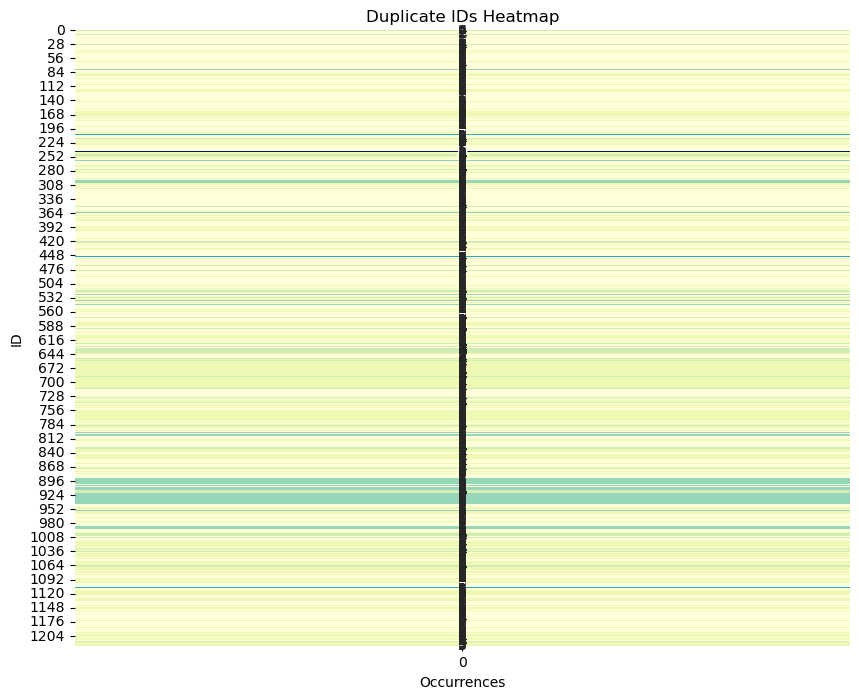

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for duplicate IDs
duplicate_ids = selected_data[selected_data.duplicated('id', keep=False)]

# Create a pivot table to count occurrences of duplicate IDs
duplicate_counts = duplicate_ids.pivot_table(index='id', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(duplicate_counts.values.reshape(-1, 1), cmap='YlGnBu', cbar=False, annot=True, fmt='d')
plt.title('Duplicate IDs Heatmap')
plt.xlabel('Occurrences')
plt.ylabel('ID')
plt.show()

In [9]:
# Remove duplicates based on 'id' column
clean_data = selected_data.drop_duplicates(subset='id')

# Check for duplicate IDs in the cleaned DataFrame
duplicate_ids_clean = clean_data[clean_data.duplicated('id', keep=False)]

# Create a pivot table to count occurrences of duplicate IDs
duplicate_counts_clean = duplicate_ids_clean.pivot_table(index='id', aggfunc='size', fill_value=0)

# Check if there are any duplicate IDs
if not duplicate_counts_clean.empty:
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(duplicate_counts_clean.values.reshape(-1, 1), cmap='YlGnBu', cbar=False, annot=True, fmt='d')
    plt.title('Duplicate IDs Heatmap in Cleaned Data')
    plt.xlabel('Occurrences')
    plt.ylabel('ID')
    plt.show()
else:
    print("No duplicate IDs found in the cleaned data.")

No duplicate IDs found in the cleaned data.


In [10]:
clean_data.head()

,id,species,breed_primary,breed_secondary,breed_mixed,color_primary,color_secondary,age,sex,size,...,shots_current,env_children,env_dogs,env_cats,name,status,contact_state_x,found,remove,still_there
0,45923603,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Blair,adoptable,NV,Arizona,NaN,NaN
1,45923600,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Duane,adoptable,NV,Arizona,NaN,NaN
2,45289127,Dog,Beagle,NaN,False,NaN,NaN,Adult,Male,Medium,...,False,NaN,True,NaN,Mustard,adoptable,NV,Las Vegas,NaN,NaN
4,44801851,Dog,Boxer,NaN,True,Bicolor,NaN,Young,Male,Large,...,True,True,True,NaN,Max,adoptable,NV,Puerto Rico,NaN,NaN
5,44731850,Dog,Maltese,Poodle,True,White / Cream,NaN,Young,Female,Small,...,True,True,True,NaN,Forever,adoptable,NV,Las Vegas,NaN,NaN


In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 0 to 6193
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               4115 non-null   int64 
 1   species          4115 non-null   object
 2   breed_primary    4115 non-null   object
 3   breed_secondary  1541 non-null   object
 4   breed_mixed      4115 non-null   bool  
 5   color_primary    1921 non-null   object
 6   color_secondary  887 non-null    object
 7   age              4115 non-null   object
 8   sex              4115 non-null   object
 9   size             4115 non-null   object
 10  coat             2147 non-null   object
 11  fixed            4115 non-null   bool  
 12  house_trained    4115 non-null   bool  
 13  special_needs    4115 non-null   bool  
 14  shots_current    4115 non-null   bool  
 15  env_children     2198 non-null   object
 16  env_dogs         2981 non-null   object
 17  env_cats         1275 non-null   

In [12]:
# Drop the 'color_secondary' column
clean_data = clean_data.drop(columns=['color_secondary'])

# Print the updated DataFrame info
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 0 to 6193
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               4115 non-null   int64 
 1   species          4115 non-null   object
 2   breed_primary    4115 non-null   object
 3   breed_secondary  1541 non-null   object
 4   breed_mixed      4115 non-null   bool  
 5   color_primary    1921 non-null   object
 6   age              4115 non-null   object
 7   sex              4115 non-null   object
 8   size             4115 non-null   object
 9   coat             2147 non-null   object
 10  fixed            4115 non-null   bool  
 11  house_trained    4115 non-null   bool  
 12  special_needs    4115 non-null   bool  
 13  shots_current    4115 non-null   bool  
 14  env_children     2198 non-null   object
 15  env_dogs         2981 non-null   object
 16  env_cats         1275 non-null   object
 17  name             4115 non-null   

In [13]:
# Calculate unique value counts
unique_counts = clean_data.nunique()

print(unique_counts)

id                 4115
species               1
breed_primary       153
breed_secondary     116
breed_mixed           2
color_primary        15
age                   4
sex                   2
size                  4
coat                  6
fixed                 2
house_trained         2
special_needs         2
shots_current         2
env_children          2
env_dogs              2
env_cats              2
name               3013
status                4
contact_state_x      46
found               518
remove                1
still_there           1
dtype: int64


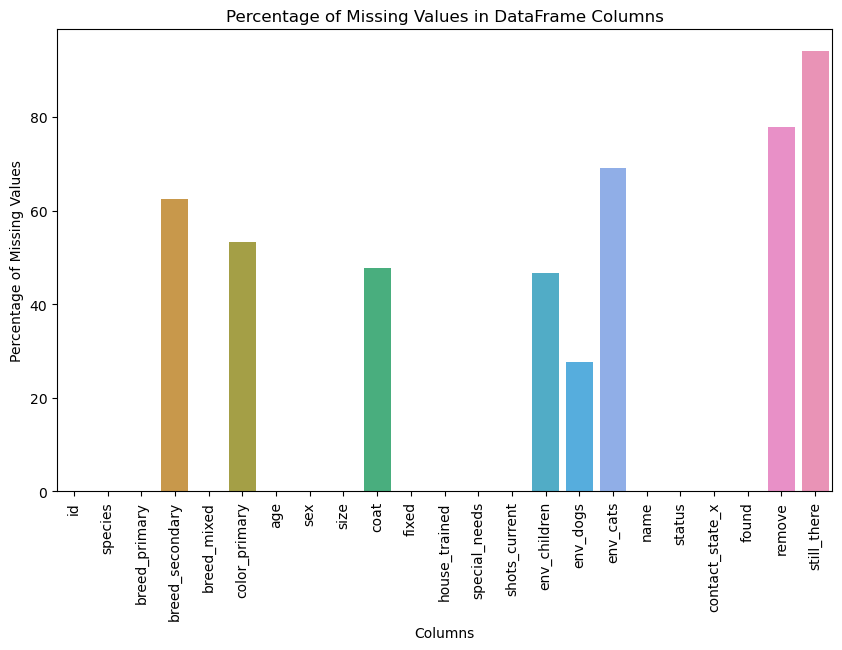

In [14]:
import seaborn as sns

# Calculate missing value percentages
missing_percent = (clean_data.isnull().sum() / len(clean_data)) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.title('Percentage of Missing Values in DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.show()

          age    size   sex color_primary
count    4115    4115  4115          1921
unique      4       4     2            15
top     Adult  Medium  Male         Black
freq     1642    2230  2116           593


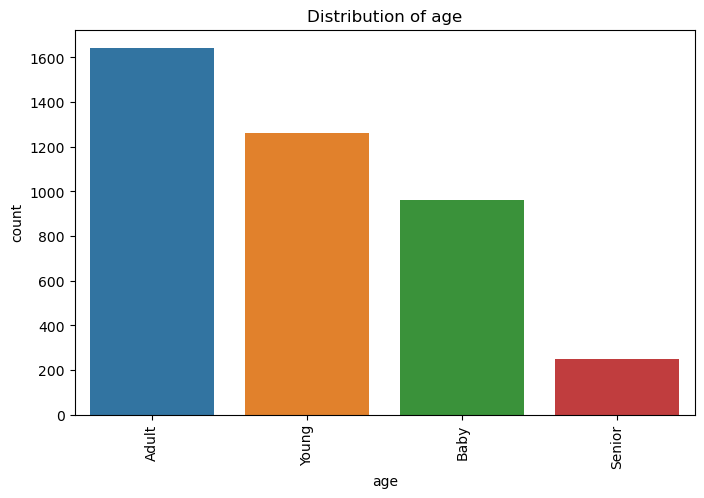

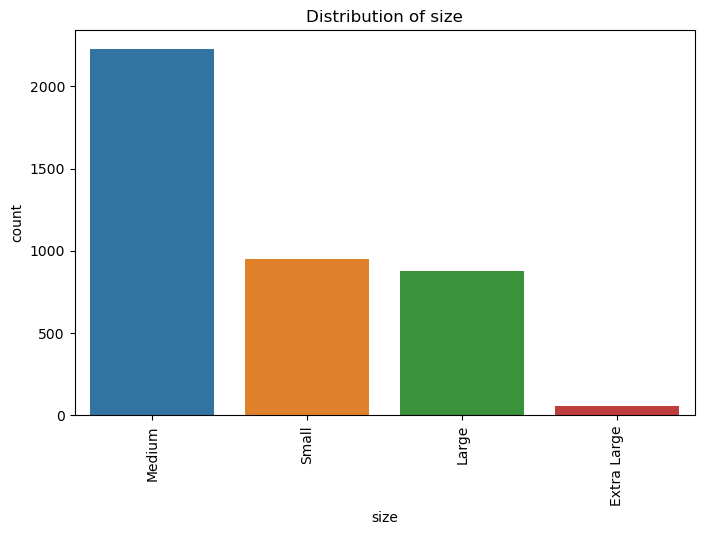

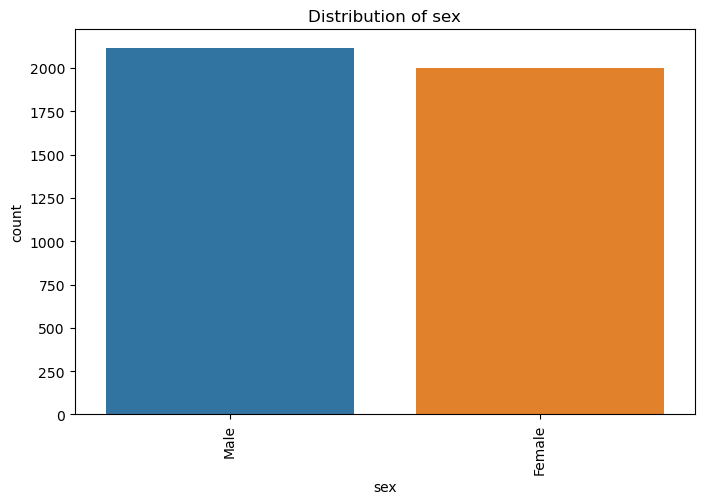

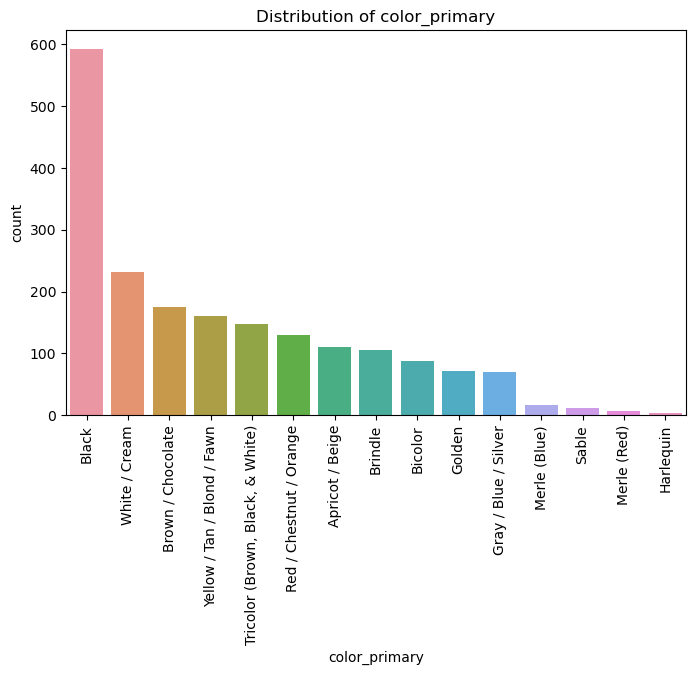

In [15]:
# Select a subset of features for investigation
selected_features = clean_data[['age', 'size', 'sex', 'color_primary']]

# Display summary statistics
feature_stats = selected_features.describe(include=object)
print(feature_stats)

# Plotting feature patterns
for column in selected_features.columns:
    if selected_features[column].dtype == object:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=selected_features, x=column, order=selected_features[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()

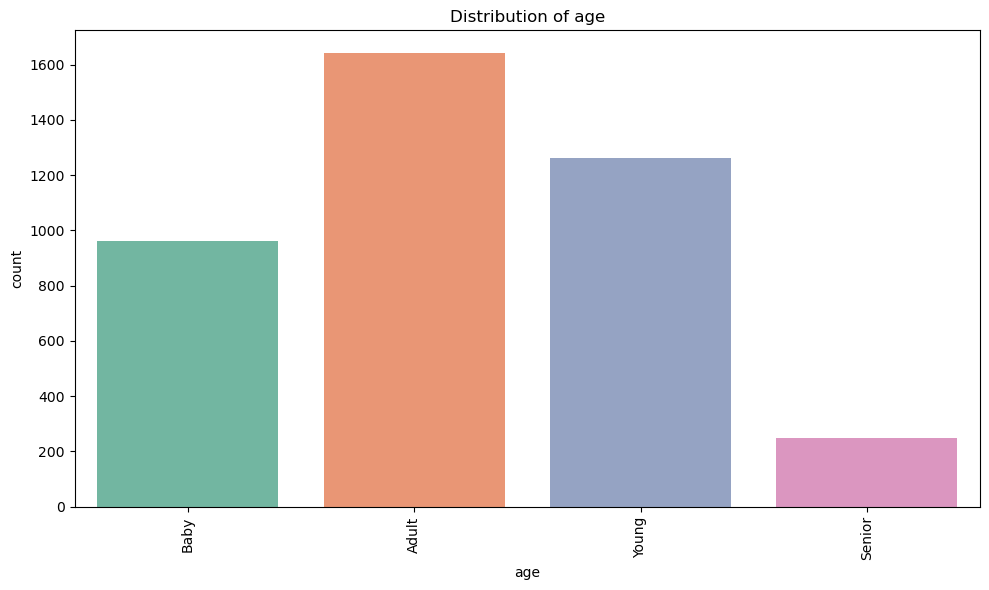

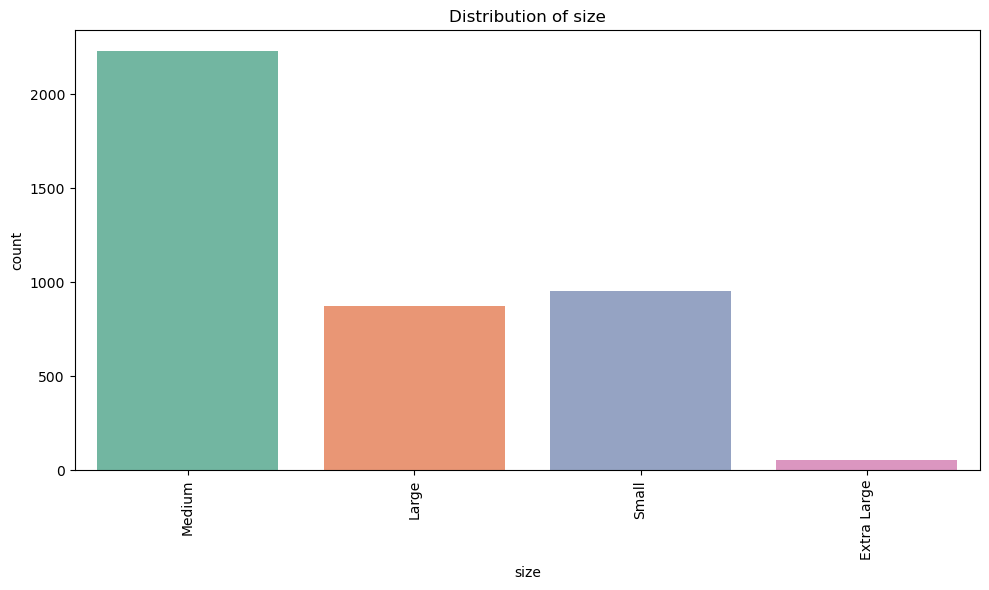

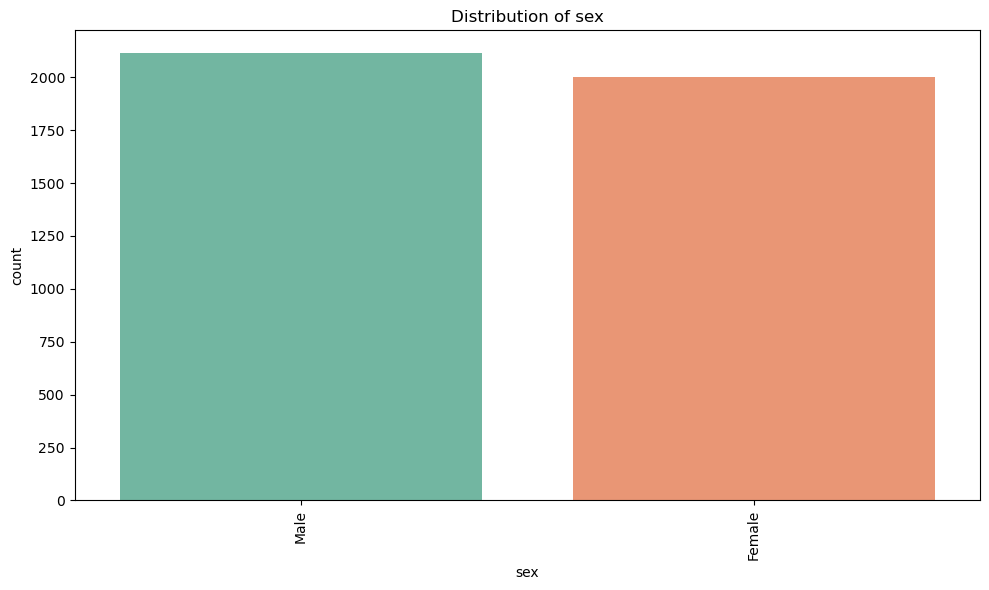

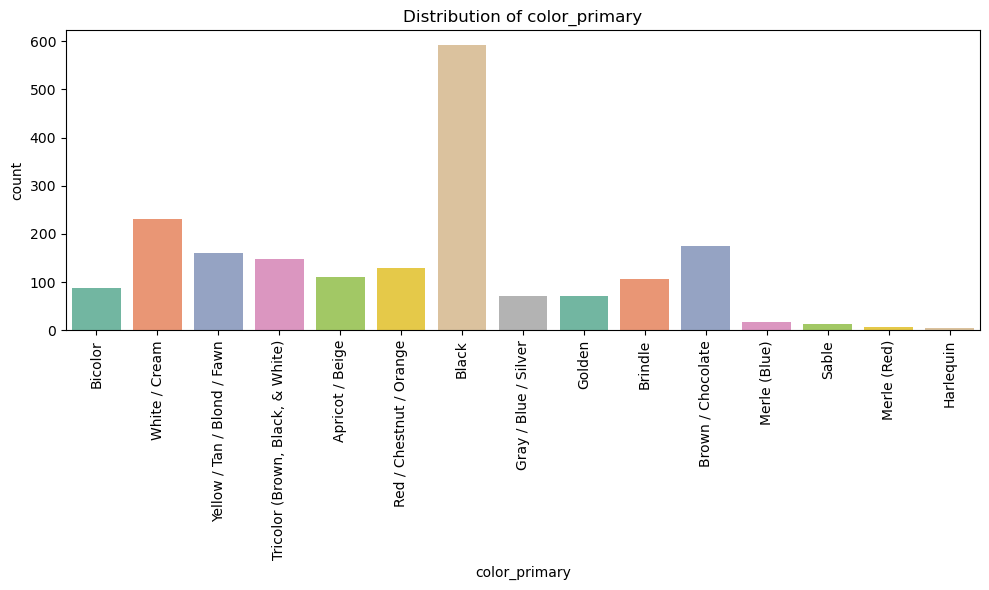

In [16]:
# Select the columns for investigation
selected_features = clean_data[['age', 'size', 'sex', 'color_primary']]

# Plotting Discrete and Ordinal Features
for column in selected_features.columns:
    if selected_features[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=selected_features, x=column, palette='Set2')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.tight_layout()  
        plt.show()

**EDA tasks for the project**

1.Data Loading: loaded the datasets "allDogDescriptions.csv" and "dogTravel.csv" into DataFrames named dog_descriptions and dog_travel.

2.Data Merging: merged the two DataFrames based on the 'id' column using pd.merge() and created a new DataFrame named merged_data.

3.Data Selection: selected a subset of columns from the merged data using the selected_columns list.

4.Data Cleaning: checked for duplicate IDs using a heatmap and removed duplicate rows based on the 'id' column using the drop_duplicates() function, resulting in the clean_data DataFrame. 
Dropped the 'color_secondary' column from the clean_data DataFrame.

5.Missing Value Analysis: calculated the percentage of missing values for each column and visualized it using a bar plot.

6.Feature Patterns Analysis: selected a subset of features for investigation (selected_features) and created count plots to visualize the distribution of categorical variables.

7.Discrete and Ordinal Feature Analysis: created count plots to visualize the distribution of discrete and ordinal features ('age', 'size', 'sex', 'color_primary').

In [17]:
from scipy.stats import ttest_ind

adopted_dogs = clean_data[clean_data['status'] == 'adopted']
non_adopted_dogs = clean_data[clean_data['status'] != 'adopted']

t_stat, p_value = ttest_ind(adopted_dogs['age'], non_adopted_dogs['age'], equal_var=False)

if p_value < 0.05:
    print("There is a significant difference in age between adopted and non-adopted dogs.")
else:
    print("Age does not significantly differ between adopted and non-adopted dogs.")

Age does not significantly differ between adopted and non-adopted dogs.


In [18]:
# Filter the data for adopted and non-adopted dogs
adopted_dogs = clean_data[clean_data['status'] == 'adopted']
non_adopted_dogs = clean_data[clean_data['status'] != 'adopted']

# Extract the ages of adopted and non-adopted dogs
adopted_breeds = adopted_dogs['breed_primary']
non_adopted_breeds = non_adopted_dogs['breed_primary']

# Perform a t-test to compare the breeds
t_stat, p_value = ttest_ind(adopted_breeds, non_adopted_breeds, equal_var=False)

if p_value < 0.05:
    print("There is a significant difference in breeds between adopted and non-adopted dogs.")
else:
    print("Breeds do not significantly differ between adopted and non-adopted dogs.")

Breeds do not significantly differ between adopted and non-adopted dogs.


In [19]:
from scipy.stats import chi2_contingency

# Create a contingency table of color vs. adoption status
color_vs_adoption = pd.crosstab(clean_data['color_primary'], clean_data['status'])

# Perform a chi-squared test
chi2, p_value, _, _ = chi2_contingency(color_vs_adoption)

if p_value < 0.05:
    print("There is a significant difference in colors between adopted and non-adopted dogs.")
else:
    print("Colors do not significantly differ between adopted and non-adopted dogs.")

There is a significant difference in colors between adopted and non-adopted dogs.


In [20]:
clean_data.head(50)

,id,species,breed_primary,breed_secondary,breed_mixed,color_primary,age,sex,size,coat,...,shots_current,env_children,env_dogs,env_cats,name,status,contact_state_x,found,remove,still_there
0,45923603,Dog,German Shepherd Dog,NaN,True,NaN,Baby,Male,Medium,NaN,...,False,NaN,NaN,NaN,Blair,adoptable,NV,Arizona,NaN,NaN
1,45923600,Dog,German Shepherd Dog,NaN,True,NaN,Baby,Male,Medium,NaN,...,False,NaN,NaN,NaN,Duane,adoptable,NV,Arizona,NaN,NaN
2,45289127,Dog,Beagle,NaN,False,NaN,Adult,Male,Medium,NaN,...,False,NaN,True,NaN,Mustard,adoptable,NV,Las Vegas,NaN,NaN
4,44801851,Dog,Boxer,NaN,True,Bicolor,Young,Male,Large,Short,...,True,True,True,NaN,Max,adoptable,NV,Puerto Rico,NaN,NaN
5,44731850,Dog,Maltese,Poodle,True,White / Cream,Young,Female,Small,Long,...,True,True,True,NaN,Forever,adoptable,NV,Las Vegas,NaN,NaN
6,44618549,Dog,Yorkshire Terrier,NaN,True,Bicolor,Young,Female,Small,Wire,...,True,True,True,NaN,Linda,adoptable,NV,Puerto Rico,NaN,NaN
7,44514846,Dog,Chihuahua,NaN,True,Yellow / Tan / Blond / Fawn,Young,Male,Small,Short,...,False,True,True,NaN,Jake,adoptable,NV,Salt Lake City,NaN,NaN
8,44369330,Dog,Chihuahua,NaN,False,"Tricolor (Brown, Black, & White)",Senior,Male,Small,Short,...,True,True,True,True,JJ,adoptable,NV,Salt Lake City,NaN,NaN
9,44070750,Dog,Yorkshire Terrier,Wirehaired Terrier,True,Apricot / Beige,Young,Male,Small,Long,...,True,True,True,NaN,Pancho,adoptable,NV,Puerto Rick,NaN,NaN
10,44070486,Dog,Labrador Retriever,NaN,True,Yellow / Tan / Blond / Fawn,Baby,Male,Large,Short,...,True,True,True,NaN,Johnny,adoptable,NV,Puerto Rico,NaN,NaN


In [21]:
print(clean_data.columns)

Index(['id', 'species', 'breed_primary', 'breed_secondary', 'breed_mixed',
       'color_primary', 'age', 'sex', 'size', 'coat', 'fixed', 'house_trained',
       'special_needs', 'shots_current', 'env_children', 'env_dogs',
       'env_cats', 'name', 'status', 'contact_state_x', 'found', 'remove',
       'still_there'],
      dtype='object')


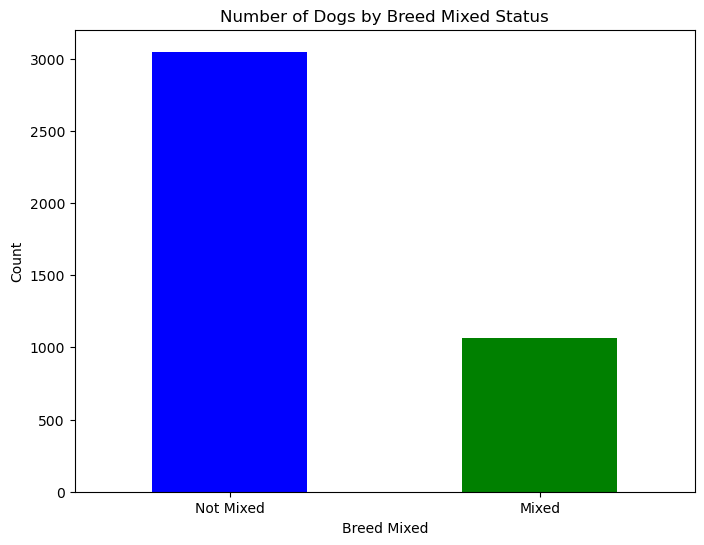

In [22]:
breed_mixed_counts = clean_data['breed_mixed'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
breed_mixed_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Dogs by Breed Mixed Status')
plt.xlabel('Breed Mixed')
plt.ylabel('Count')
plt.xticks(range(len(breed_mixed_counts)), ['Not Mixed', 'Mixed'], rotation=0)
plt.show()

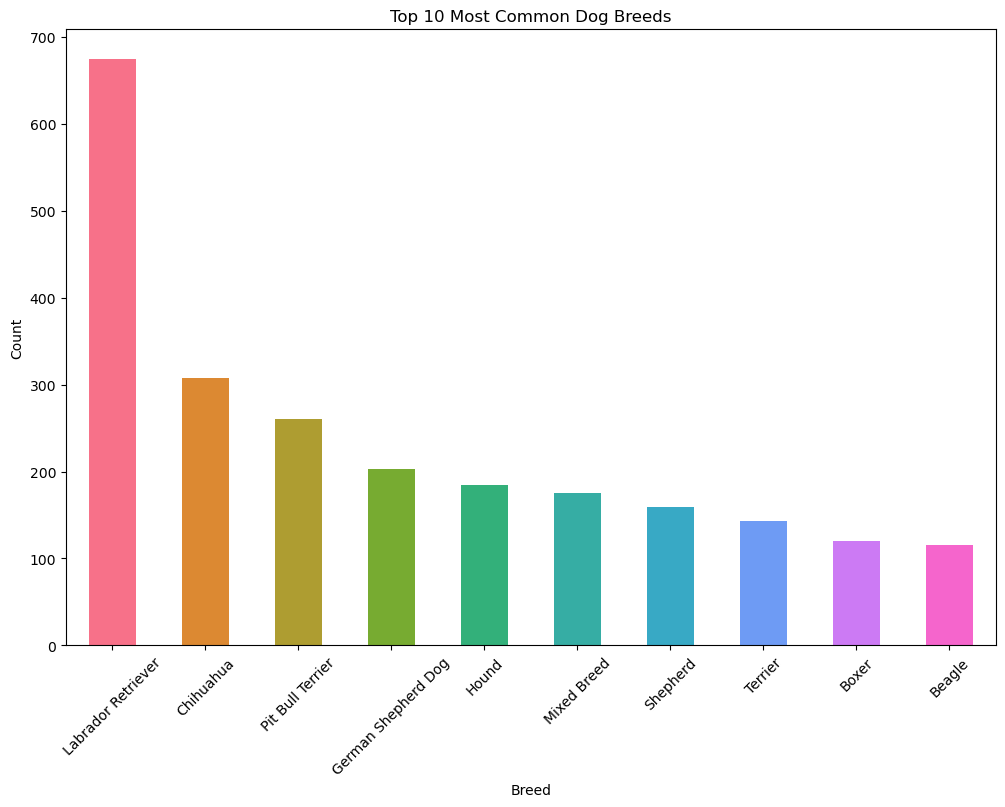

In [23]:
top_n_breeds = clean_data['breed_primary'].value_counts().head(10)

# Define a custom color palette using Seaborn
custom_palette = sns.color_palette("husl", len(top_n_breeds))

# Create a bar chart with custom colors
plt.figure(figsize=(12, 8))
top_n_breeds.plot(kind='bar', color=custom_palette)
plt.title('Top 10 Most Common Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [24]:
from scipy.stats import chi2_contingency

categorical_features = ['size', 'sex', 'color_primary', 'breed_primary']

for feature in categorical_features:
    contingency_table = pd.crosstab(clean_data[feature], clean_data['status'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {feature}: p-value = {p}')

Chi-squared test for size: p-value = 0.29488009704403173
Chi-squared test for sex: p-value = 0.38215654554717476
Chi-squared test for color_primary: p-value = 0.011983986570131042
Chi-squared test for breed_primary: p-value = 5.7995808175944624e-68


### Based on the p-values, here's what you can infer about the influence of each feature on adoption status:

#### Size
The p-value for the size feature is approximately 0.295, which is greater than the typical significance level of 0.05. This suggests that there may not be a significant association between the size of a dog and its adoption status.

#### Sex 
The p-value for the sex feature is approximately 0.382, which is greater than 0.05. Similar to size, this suggests that there may not be a significant association between the sex of a dog and its adoption status.

#### Color Primary
The p-value for the color_primary feature is approximately 0.012, which is less than 0.05. This indicates that there is a statistically significant association between the primary color of a dog and its adoption status. Further analysis can help identify which colors are more likely to be associated with adoption.

#### Breed Primary
The p-value for the breed_primary feature is extremely small (close to zero), indicating a highly significant association between the primary breed of a dog and its adoption status. This suggests that the breed of a dog is a strong predictor of adoption status, and certain breeds may be more or less likely to be adopted.

Based on these results, it appears that the primary breed and primary color of a dog are the most influential features in predicting adoption status. Further analysis of these features can help provide insights into which breeds and colors are associated with higher adoption rates.

In [25]:
unique_values_count = clean_data['still_there'].nunique()
print(f"Number of unique values in 'still_there' column: {unique_values_count}")

Number of unique values in 'still_there' column: 1


In [26]:
unique_values = clean_data['still_there'].unique()
print(unique_values)

[nan True]


In [27]:
# Filter rows where 'status' is 'adoptable' and check if 'still_there' is 'True'
is_true_when_adoptable = clean_data[(clean_data['status'] == 'adoptable') & (clean_data['still_there'] == True)]

# Check if there are any rows where the condition is met
if not is_true_when_adoptable.empty:
    print("The value 'True' is present in the 'still_there' column when 'status' is 'adoptable'.")
else:
    print("The value 'True' is not present in the 'still_there' column when 'status' is 'adoptable'.")

The value 'True' is present in the 'still_there' column when 'status' is 'adoptable'.


In [28]:
# Filter rows where 'status' is not 'adoptable'
other_than_adoptable = clean_data[clean_data['status'] != 'adoptable']

# Get unique values in the 'still_there' column for rows with 'status' other than 'adoptable'
unique_values_still_there = other_than_adoptable['still_there'].unique()

print(unique_values_still_there)

[nan]


1.The 'still_there' column contains two unique values: 'nan' and 'True'.
2.When 'status' is 'adoptable', the 'still_there' column has the value 'True'.
3.When 'status' is not 'adoptable' (i.e., for other statuses), the 'still_there' column has the value 'nan' (which typically represents missing or null values).

In [29]:
# Replace 'nan' values with 'False' in the 'still_there' column
clean_data['still_there'].fillna(False, inplace=True)

# Check the unique values in the 'still_there' column again
unique_values_still_there = clean_data['still_there'].unique()
print(unique_values_still_there)

[False  True]


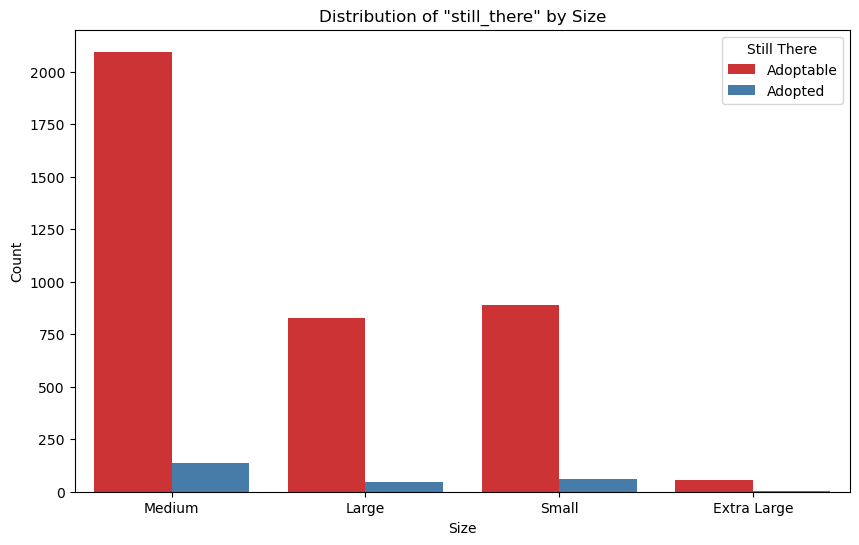

In [30]:
# Create a stacked bar chart for 'size' and 'still_there'
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data, x='size', hue='still_there', palette='Set1')
plt.title('Distribution of "still_there" by Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.legend(title='Still There', labels=['Adoptable', 'Adopted'])
plt.show()

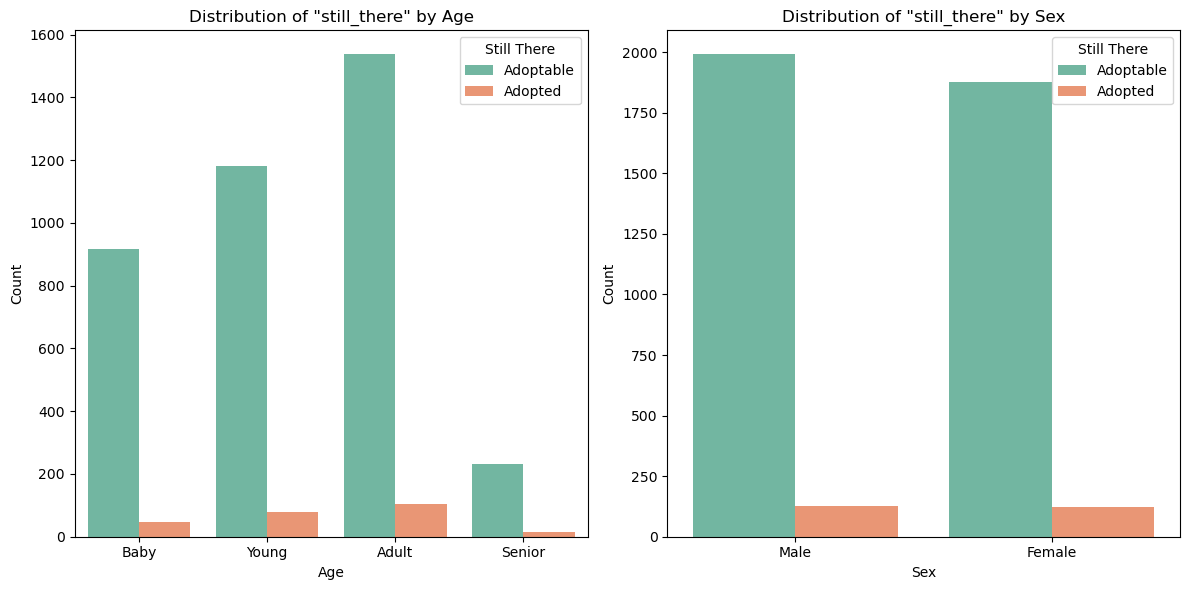

In [31]:
# Define the order for the 'age' and 'sex' categories
age_order = ['Baby', 'Young', 'Adult', 'Senior']
sex_order = ['Male', 'Female']

# Define a color palette for the 'still_there' column
palette = sns.color_palette("Set2")

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot 'age' vs. 'still_there'
plt.subplot(1, 2, 1)
sns.countplot(data=clean_data, x='age', hue='still_there', palette=palette, order=age_order)
plt.title('Distribution of "still_there" by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Still There', labels=['Adoptable', 'Adopted'])

# Plot 'sex' vs. 'still_there'
plt.subplot(1, 2, 2)
sns.countplot(data=clean_data, x='sex', hue='still_there', palette=palette, order=sex_order)
plt.title('Distribution of "still_there" by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Still There', labels=['Adoptable', 'Adopted'])

plt.tight_layout()
plt.show()

In [32]:
# Create a contingency table of 'color_primary' vs 'still_there'
contingency_table = pd.crosstab(clean_data['color_primary'], clean_data['still_there'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p < alpha:
    print("There is a significant association between 'color_primary' and 'still_there'.")
else:
    print("There is no significant association between 'color_primary' and 'still_there'.")

Chi-Square Statistic: 56.39699991164295
P-value: 4.97418936843205e-07
There is a significant association between 'color_primary' and 'still_there'.


#### The chi-squared test indicate that there is a significant association between the 'color_primary' and 'still_there' variables. This suggests that the color of a dog may have a statistically significant influence on whether a dog is still available for adoption or not.

In [33]:
# Create a contingency table of 'size' vs 'still_there'
contingency_table = pd.crosstab(clean_data['size'], clean_data['still_there'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p < alpha:
    print("There is a significant association between 'size' and 'still_there'.")
else:
    print("There is no significant association between 'size' and 'still_there'.")

Chi-Square Statistic: 1.1110618755168806
P-value: 0.7744043963525931
There is no significant association between 'size' and 'still_there'.


#### The results indicate that there is no significant association between the 'size' of a dog and whether the dog is still available for adoption or not ('still_there'). This suggests that the size of a dog does not have a statistically significant influence on its availability for adoption.

In [34]:
# Create a contingency table of 'age' vs 'still_there'
contingency_table = pd.crosstab(clean_data['age'], clean_data['still_there'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p < alpha:
    print("There is a significant association between 'age' and 'still_there'.")
else:
    print("There is no significant association between 'age' and 'still_there'.")

Chi-Square Statistic: 3.351918340826118
P-value: 0.34048170152682966
There is no significant association between 'age' and 'still_there'.


####  There is no significant association between the 'age' of dogs and their 'still_there' status. The p-value is greater than the chosen significance level (e.g., 0.05), indicating that there is no strong evidence to reject the null hypothesis that the two variables are independent. This means that the 'age' of a dog does not appear to be significantly related to whether the dog is still available for adoption ('still_there').

In [35]:
# Create a contingency table
contingency_table = pd.crosstab(clean_data['breed_primary'], clean_data['still_there'])

# Perform chi-squared test
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
# Check if the p-value is less than the significance level
if p < alpha:
    print("There is a significant association between 'age' and 'still_there'.")
else:
    print("There is no significant association between 'age' and 'still_there'.")

Chi-Square Statistic: 235.08943007568277
P-value: 1.7665311646746347e-05
There is a significant association between 'age' and 'still_there'.


####  There is a significant association between the 'breed_primary' of a dog and the 'still_there' status, as indicated by the low p-value. This suggests that the breed of a dog may play a role in whether they are still available for adoption or have already been adopted.

Now that the chi-squared tests have been performed and significant associations have been identified between certain categorical variables (such as 'color_primary' and 'age') and the 'still_there' status, the next steps to consider:

###### Interpretation of Results
Take some time to interpret the results of the chi-squared tests. Specifically, understand how these associations can be explained in the context of the dataset. For example, why might certain colors or age groups be more likely to still be available for adoption?

###### Feature Importance
If these categorical variables are relevant to the analysis or predictive modeling, consider incorporating them as features in the models. For example, they could be used to predict whether a dog is likely to still be available for adoption.

##### Further Analysis
Explore these associations in more detail. Create visualizations or cross-tabulations to understand the distribution of 'still_there' status within different categories of the significant variables. This can provide additional insights.

##### Machine Learning Models
If the goal is to predict 'still_there' status or understand the factors influencing it, build machine learning models. Logistic regression or other classification algorithms can be used to predict whether a dog is still available for adoption based on various features, including the significant categorical variables.

###### Model Evaluation
If I choose to build predictive models, can't forget to evaluate their performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and techniques like cross-validation.

##### Actionable Insights
Consider how the insights gained from these associations can be translated into actionable strategies or recommendations for animal shelters or rescue organizations. For example, if color is a significant factor, organizations may adjust their promotion or adoption strategies accordingly.

In [36]:
print(clean_data.dtypes)

id                  int64
species            object
breed_primary      object
breed_secondary    object
breed_mixed          bool
color_primary      object
age                object
sex                object
size               object
coat               object
fixed                bool
house_trained        bool
special_needs        bool
shots_current        bool
env_children       object
env_dogs           object
env_cats           object
name               object
status             object
contact_state_x    object
found              object
remove             object
still_there          bool
dtype: object


In [37]:
clean_data.head()

,id,species,breed_primary,breed_secondary,breed_mixed,color_primary,age,sex,size,coat,...,shots_current,env_children,env_dogs,env_cats,name,status,contact_state_x,found,remove,still_there
0,45923603,Dog,German Shepherd Dog,NaN,True,NaN,Baby,Male,Medium,NaN,...,False,NaN,NaN,NaN,Blair,adoptable,NV,Arizona,NaN,False
1,45923600,Dog,German Shepherd Dog,NaN,True,NaN,Baby,Male,Medium,NaN,...,False,NaN,NaN,NaN,Duane,adoptable,NV,Arizona,NaN,False
2,45289127,Dog,Beagle,NaN,False,NaN,Adult,Male,Medium,NaN,...,False,NaN,True,NaN,Mustard,adoptable,NV,Las Vegas,NaN,False
4,44801851,Dog,Boxer,NaN,True,Bicolor,Young,Male,Large,Short,...,True,True,True,NaN,Max,adoptable,NV,Puerto Rico,NaN,False
5,44731850,Dog,Maltese,Poodle,True,White / Cream,Young,Female,Small,Long,...,True,True,True,NaN,Forever,adoptable,NV,Las Vegas,NaN,False


In [38]:

clean_data = clean_data[['id', 'species', 'breed_mixed', 'sex', 'coat', 'fixed', 'house_trained', 'special_needs', 'shots_current', 'still_there']]

In [39]:
print(clean_data.dtypes)

id                int64
species          object
breed_mixed        bool
sex              object
coat             object
fixed              bool
house_trained      bool
special_needs      bool
shots_current      bool
still_there        bool
dtype: object


In [40]:
categorical_cols = ['species', 'sex', 'coat']

# Create dummy variables
clean_data_with_dummies = pd.get_dummies(clean_data, columns=categorical_cols, drop_first=True)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming clean_data_with_dummies is a pandas DataFrame
X = clean_data_with_dummies.drop(['still_there', 'breed_mixed', 'house_trained', 'special_needs'], axis=1)  
y = clean_data_with_dummies['breed_mixed']

scaler = StandardScaler()

# Fitting data to the scaler object and transforming the data
scaled_X = scaler.fit_transform(X)

# Converting the scaled data back to a DataFrame
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(scaled_X_df, y, test_size=0.2, random_state=42)

● Does my data set have any categorical data, such as Gender or day of the week?
The following columns are categorical:
species: This is likely to be a categorical variable indicating the species of each entry (e.g., dog, cat, etc.).
sex: This is a categorical variable that typically would include values like male, female, unknown, etc.
coat: This also represents categorical data, likely describing the type of coat (e.g., short, long, curly, etc.).

● Do my features have data values that range from 0 - 100 or 0-1 or both and more?
The boolean columns, as stated, range from 0 to 1 after conversion.
The id column, being an integer, could potentially have a wide range of values depending on the dataset size.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.6573511543134872
Classification Report:
              precision    recall  f1-score   support

       False       0.34      0.27      0.30       223
        True       0.75      0.80      0.77       600

    accuracy                           0.66       823
   macro avg       0.54      0.54      0.54       823
weighted avg       0.64      0.66      0.65       823



In [44]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           n_jobs=-1 
                           )

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
best_rf_model.fit(X_train, y_train)
y_pred_best = best_rf_model.predict(X_test)

# Assess the performance of the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
best_classification_report = classification_report(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Best Model Accuracy: {best_accuracy}")
print("Best Model Classification Report:\n", best_classification_report)

C:\Users\astri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\astri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Model Accuracy: 0.7205346294046172
Best Model Classification Report:
               precision    recall  f1-score   support

       False       0.33      0.03      0.06       223
        True       0.73      0.98      0.84       600

    accuracy                           0.72       823
   macro avg       0.53      0.50      0.45       823
weighted avg       0.62      0.72      0.62       823



The model performs significantly better for the 'True' class (breed is mixed) compared to the 'False' class (breed is not mixed). 

This might be due to class imbalance. 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
logistic_regression_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)

# Fit the Logistic Regression model
logistic_regression_model.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_logistic = logistic_regression_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print the results for Logistic Regression
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Classification Report:\n{report_logistic}")

# Print the results for SVM
print("\nSupport Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm}")
print(f"Classification Report:\n{report_svm}")

Logistic Regression Model:
Accuracy: 0.7314702308626975
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.01      0.02       223
        True       0.73      1.00      0.84       600

    accuracy                           0.73       823
   macro avg       0.87      0.50      0.43       823
weighted avg       0.80      0.73      0.62       823


Support Vector Machine (SVM) Model:
Accuracy: 0.7278250303766707
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       223
        True       0.73      1.00      0.84       600

    accuracy                           0.73       823
   macro avg       0.36      0.50      0.42       823
weighted avg       0.53      0.73      0.61       823



**Logistic Regression Model**
Accuracy: Approximately 0.731 (73.1%)
Precision for the 'False' class is very high (1.00), but this is likely due to a low recall (0.01), indicating that the model predicts 'False' very rarely, and when it does, it is mostly correct.
Precision for the 'True' class is 0.73, indicating that when the model predicts 'True,' it is reasonably accurate.
Recall for the 'True' class is high at 1.00, meaning the model captures all 'True' cases.
The F1-score for the 'True' class is also high at 0.84, indicating good overall performance for this class.
However, the model's performance on the 'False' class is poor with an F1-score of only 0.02.

**Support Vector Machine Model**
Accuracy: Approximately 0.728 (72.8%)
Precision for the 'False' class is low (0.00), which indicates that the model rarely predicts 'False' and is almost always incorrect when it does.
Precision for the 'True' class is 0.73, indicating reasonably accurate predictions for 'True.'
Recall for the 'True' class is high at 1.00, capturing all 'True' cases.
However, recall for the 'False' class is also low (0.00), indicating that the model is not capturing any 'False' cases.
The F1-score for the 'True' class is high at 0.84, but the F1-score for the 'False' class is 0.00.



May need to address the class imbalance issue in the dataset or maybe consider other techniques like adjusting decision thresholds to improve the models' performance on the 'False' class. 

In [47]:
# Define a function to adjust the decision threshold for a given SVM model
def adjust_threshold_svm(model, X, threshold):
    decision_values = model.decision_function(X)  # Get the decision values
    adjusted_predictions = (decision_values > threshold).astype(int)
    return adjusted_predictions

# Adjust the threshold for the SVM model
threshold_svm = 0.0  # You can adjust this threshold value
y_pred_svm_adjusted = adjust_threshold_svm(svm_model, X_test, threshold_svm)

# Evaluate the adjusted SVM model
accuracy_svm_adjusted = accuracy_score(y_test, y_pred_svm_adjusted)
report_svm_adjusted = classification_report(y_test, y_pred_svm_adjusted)

# Print the results for adjusted SVM
print("Adjusted Support Vector Machine (SVM) Model:")
print(f"Accuracy: {accuracy_svm_adjusted}")
print(f"Classification Report:\n{report_svm_adjusted}")

Adjusted Support Vector Machine (SVM) Model:
Accuracy: 0.7278250303766707
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       223
        True       0.73      1.00      0.84       600

    accuracy                           0.73       823
   macro avg       0.36      0.50      0.42       823
weighted avg       0.53      0.73      0.61       823



Given the results, it would be best to consider other approaches to address the class imbalance issue or further explore feature engineering and data preprocessing techniques to enhance the model's ability to distinguish between the two classes.